Malena Sol Alamo, LU: 1620/21

Lorenzo Gandolfo, LU: 169/21

Victoria Klimkowski, LU: 1390/21

### Configuracion

In [1]:
import numpy as np
import cmath
import math
import matplotlib.pyplot as plt

from skimage.draw import rectangle, line
from skimage.transform import rotate
import skimage.io as io
import os

ModuleNotFoundError: No module named 'skimage'

### Ejemplo de Numeros Imaginarios

In [2]:
x = 5
y = 3

# creamos a z = x + iy
z = x + 1j * y

# imprimimos la parte Real e Imaginaria. T
print("La parte real del numero es:", z.real)
print("La parte imaginaria del numero es:", z.imag)

print()

# Numpy tambien acepta operar con numeros complejos
arregloReales = np.random.randint(size=4,low=-10, high=10)
arregloImaginarios = np.random.randint(size=4,low=-10, high=10) * 1j
arregloComplejo = arregloReales + arregloImaginarios

print("Arreglo Complejo")
print(arregloComplejo)

print("Parte Real")
print(np.real(arregloComplejo))

print("Parte Imaginaria")
print(np.imag(arregloComplejo))


La parte real del numero es: 5.0
La parte imaginaria del numero es: 3.0

Arreglo Complejo
[-3.+2.j -8.+2.j  7.+6.j  5.-6.j]
Parte Real
[-3. -8.  7.  5.]
Parte Imaginaria
[ 2.  2.  6. -6.]


### 1. [Terminado] Graficar las bases de la Transformada de Fourier de dimensión 8 en 1-D y de dimensión 8 × 8 en 2-D

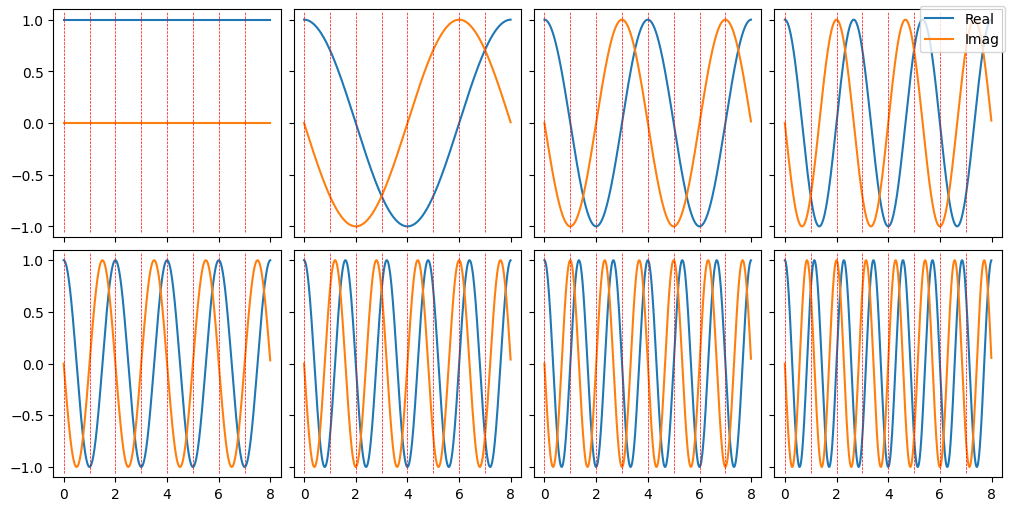

In [3]:
#Numero de Muestras de la senal
N = 8

#Opciones para graficar
#Velocidad del sampleo
sampleoRate = 1/100
#Cuantos sampleos se haran
sampleoGrafico = int(N/sampleoRate)

#Inicializamos un arreglo para guardar cada base y su evolucion
bases1D = np.zeros((N,sampleoGrafico)) * 1j

#Recorremos cada frecuencia
for frecuencia in range(0,N):
    for i in range(sampleoGrafico):
    # Por cada vemos como avanza en el tiempo para luego plotearla
      t = i*sampleoRate
      frecuenciaAngular = ((2*np.pi)/N) * (frecuencia);
    # Calculamos la parte real e imaginaria de la base.
      bases1D[frecuencia][i] = np.exp(-1j * frecuenciaAngular * t)

fig, axes = plt.subplots(2,4, figsize=(10, 5),sharex=True, sharey=True, layout="constrained")
for base in range(N):
    axes[base//4][base%4].plot(np.arange(0,sampleoGrafico*sampleoRate,sampleoRate),np.real(bases1D[base]))
    axes[base//4][base%4].plot(np.arange(0,sampleoGrafico*sampleoRate,sampleoRate),np.imag(bases1D[base]))
    for sample in range(N):
      # Mostramos que valor tiene cada base al momento del sampleo de las N.
      axes[base//4][base%4].axvline(x = sample, ymin=0.02, ymax=0.99  , color = 'r', ls='--', lw=0.5)

fig.legend(["Real", "Imag"], loc="upper right")

plt.show()


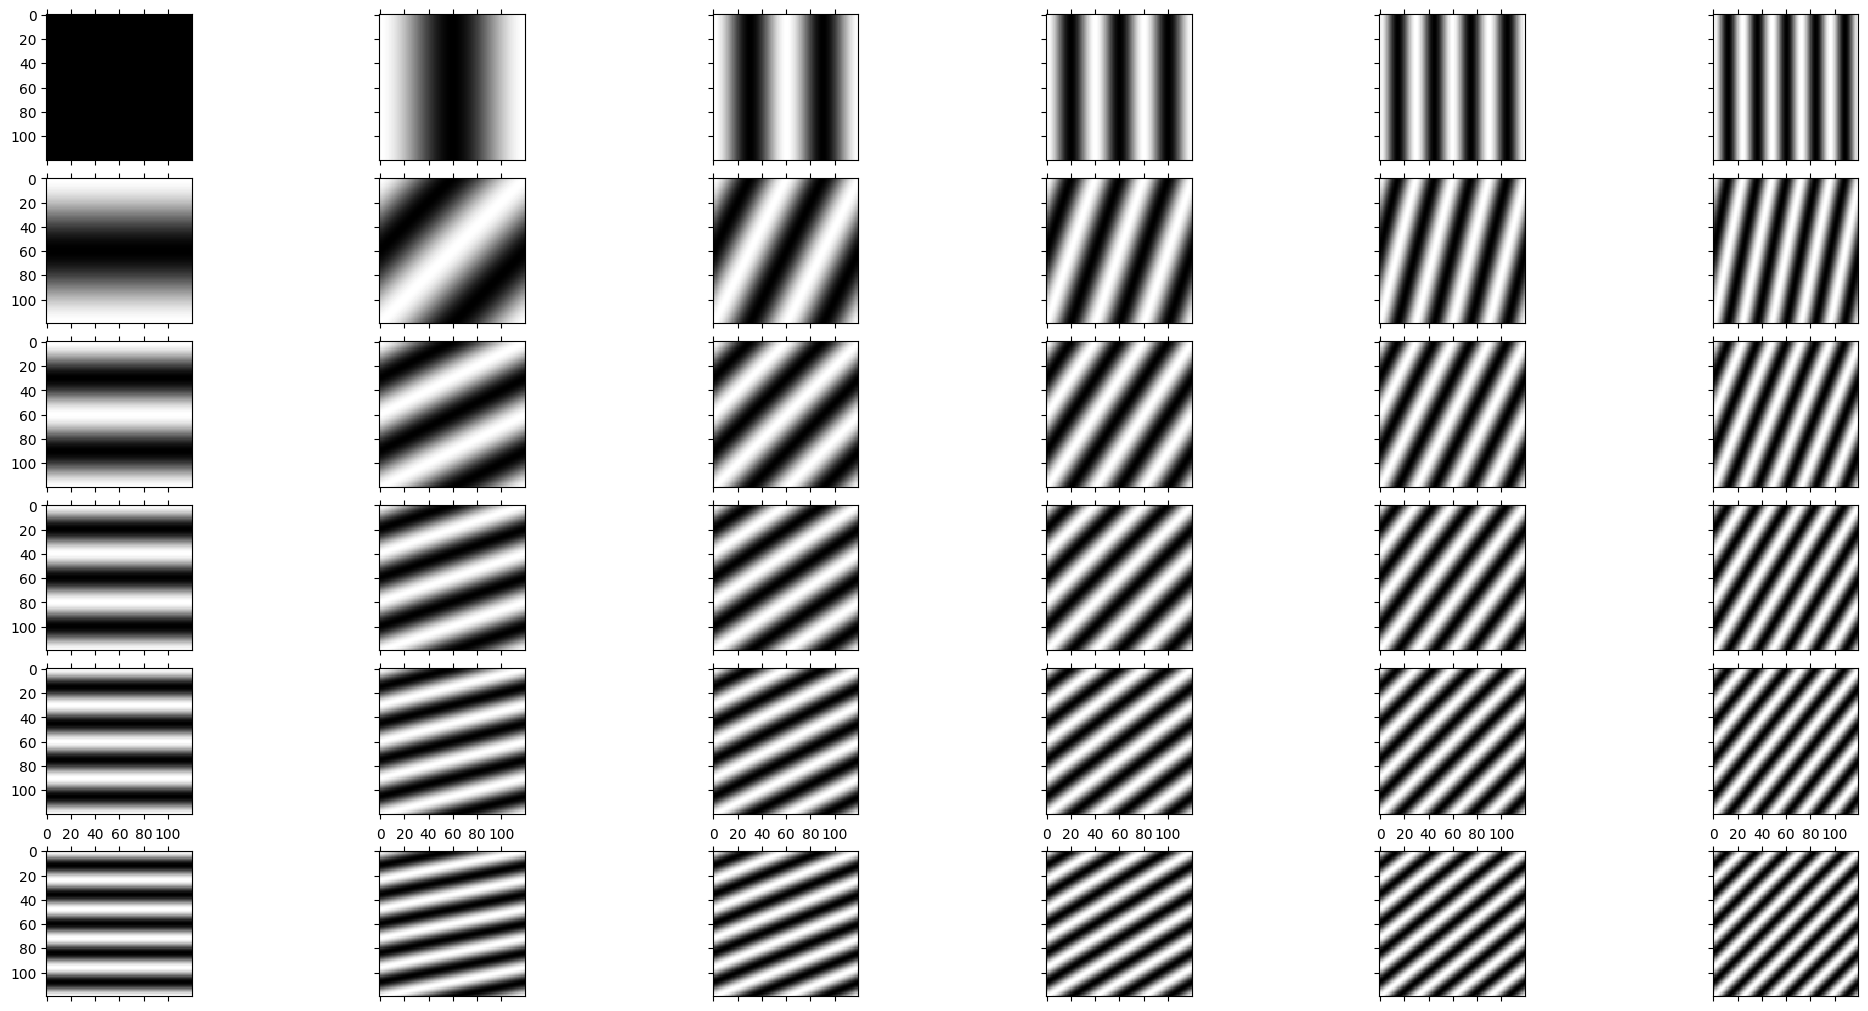

In [4]:
# Ploteo de las bases en 2D
#Definimos el sampleo horizontal y vertical
N = 6
M = 6
#Configuramos los valores para graficar
sampleoRate = 1/20
sampleoGrafico = int(N/sampleoRate)

#Ahora nuestras bases seran matrices, no arreglos
bases2D = np.zeros((N,M,sampleoGrafico,sampleoGrafico)) * 1j

for frecuenciaX in range(0,N):
  for frecuenciaY in range(0,M):
    for intervaloX in range(sampleoGrafico):
      for intervaloY in range(sampleoGrafico):
        # Calculamos como la base avanza en el tiempo y guardamos su valor
        tX = intervaloX*sampleoRate
        tY = intervaloY*sampleoRate
        frecuenciaAngularX = (2 * np.pi / N) * frecuenciaX
        frecuenciaAngularY = (2 * np.pi / M) * frecuenciaY
        angulo = frecuenciaAngularX * tX + frecuenciaAngularY * tY
        bases2D[frecuenciaX][frecuenciaY][intervaloX][intervaloY] = np.exp(-1j * angulo) # Lo cambie porque i y j no estaban definidos

fig, axes = plt.subplots(N,M, figsize=(20, 10),sharex=True, sharey=True, layout="constrained")
for baseX in range(N):
  for baseY in range(M):
    axes[baseX][baseY].matshow(np.real(bases2D[baseX][baseY]),cmap=plt.cm.gray)


### [Terminado] Implementar la DFT en 1D

Visualizacion interactiva entre la relacion de los numeros complejos y los caminos circulares: [betterexplained.com](https://betterexplained.com/examples/fourier/)

In [5]:
"""La funcion debe devolver un arreglo con la magnitud de la frecuencia y tambien su Fase"""
def DFT_1D(senal):
    N = len(senal)
    dft_result = np.zeros(N) * 1j
    # Realizamos el producto interno entre cada base y la senal original
    for k in range(N):  # Para cada frecuencia k
        for n in range(N):  # Para cada punto n de la señal
            angulo = -2j * np.pi * k * n / N  # Factor de rotación
            dft_result[k] += senal[n] * np.exp(angulo)  # Producto interno con la base compleja
  # Calculamas el modulo y la fase del numero complejo
    magnitudes = np.abs(dft_result)
    fases = np.angle(dft_result)
    return magnitudes, fases


def IDFT_1D(senalModulo, senalFase):
    N = len(senalModulo)
    imagen_reconstruida = np.zeros(N) * 1j
    dft_result = senalModulo * np.exp(1j * senalFase)
  # Realizamos la sumatoria entre cada base y su proyeccion
  # obteniendo la imagen original
    for n in range(N):  # Para cada punto n de la señal
        for k in range(N):  # Para cada frecuencia k
            angulo = 2j * np.pi * k * n / N  # Factor de rotación (inverso)
            imagen_reconstruida[n] += dft_result[k] * np.exp(angulo)
    imagen_reconstruida = imagen_reconstruida / N
    # Si devolvemos ambas se rompe el gráfico
    return np.real(imagen_reconstruida) , np.imag(imagen_reconstruida)

In [6]:
print(DFT_1D(np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])))

(array([9.        , 5.02733949, 1.        , 1.49660576, 1.        ,
       0.66817864, 1.        , 0.19891237, 1.        , 0.19891237,
       1.        , 0.66817864, 1.        , 1.49660576, 1.        ,
       5.02733949]), array([ 0.00000000e+00, -1.57079633e+00,  4.66973965e-16, -1.57079633e+00,
        4.57695098e-17, -1.57079633e+00,  1.62296650e-15, -1.57079633e+00,
        4.89858720e-16,  1.57079633e+00,  3.40147206e-18,  1.57079633e+00,
        8.03442344e-16,  1.57079633e+00,  2.82472854e-15,  1.57079633e+00]))


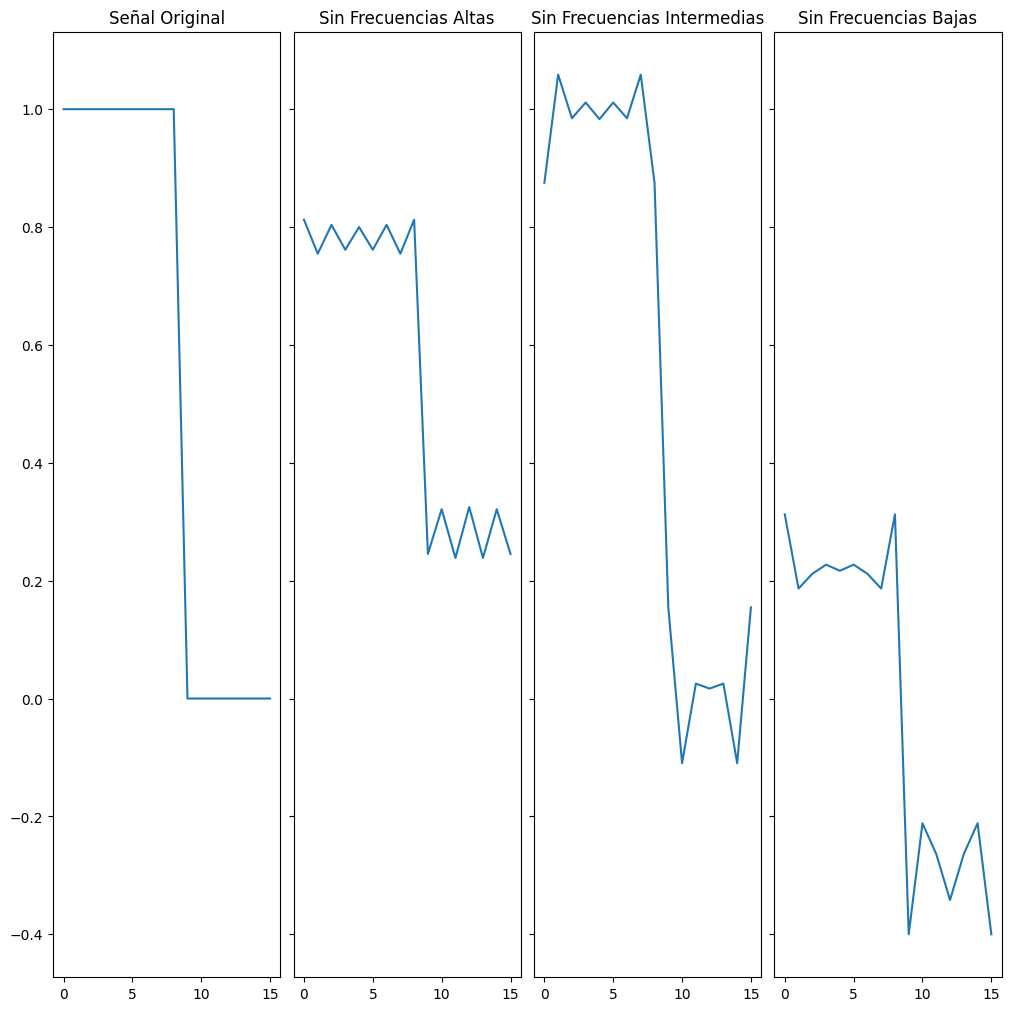

In [7]:
senal = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])
senalModulo, senalFase = DFT_1D(senal)
N = len(senalModulo)

# Asumo que las frecuencias se dividen en 3 partes iguales: altas, intermedias y bajas

## Suprimir Frecuencias Altas
senalModuloSinAltas = senalModulo.copy()
senalModuloSinAltas[2*N//3:] = 0
senalSinAltas, senalSinAltasImag = IDFT_1D(senalModuloSinAltas,senalFase)

## Suprimir Frecuencias Intermedias
senalModuloSinIntermedias = senalModulo.copy()
senalModuloSinIntermedias[N//3:2*N//3] = 0
senalSinIntermedias, senalSinIntermediasImag = IDFT_1D(senalModuloSinIntermedias,senalFase)

## Suprimir Frecuencias Bajas
senalModuloSinBajas = senalModulo.copy()
senalModuloSinBajas[:N//3] = 0
senalSinBajas, senalSinBajasImag = IDFT_1D(senalModuloSinBajas,senalFase)


fig, axes = plt.subplots(1, 4, figsize=(10, 10),sharex=True, sharey=True, layout="constrained")

axes[0].plot(range(senal.shape[0]), senal)
axes[0].set_title("Señal Original")

axes[1].plot(range(senal.shape[0]), senalSinAltas)
axes[1].set_title("Sin Frecuencias Altas")

axes[2].plot(range(senal.shape[0]), senalSinIntermedias)
axes[2].set_title("Sin Frecuencias Intermedias")

axes[3].plot(range(senal.shape[0]), senalSinBajas)
axes[3].set_title("Sin Frecuencias Bajas")

plt.show()


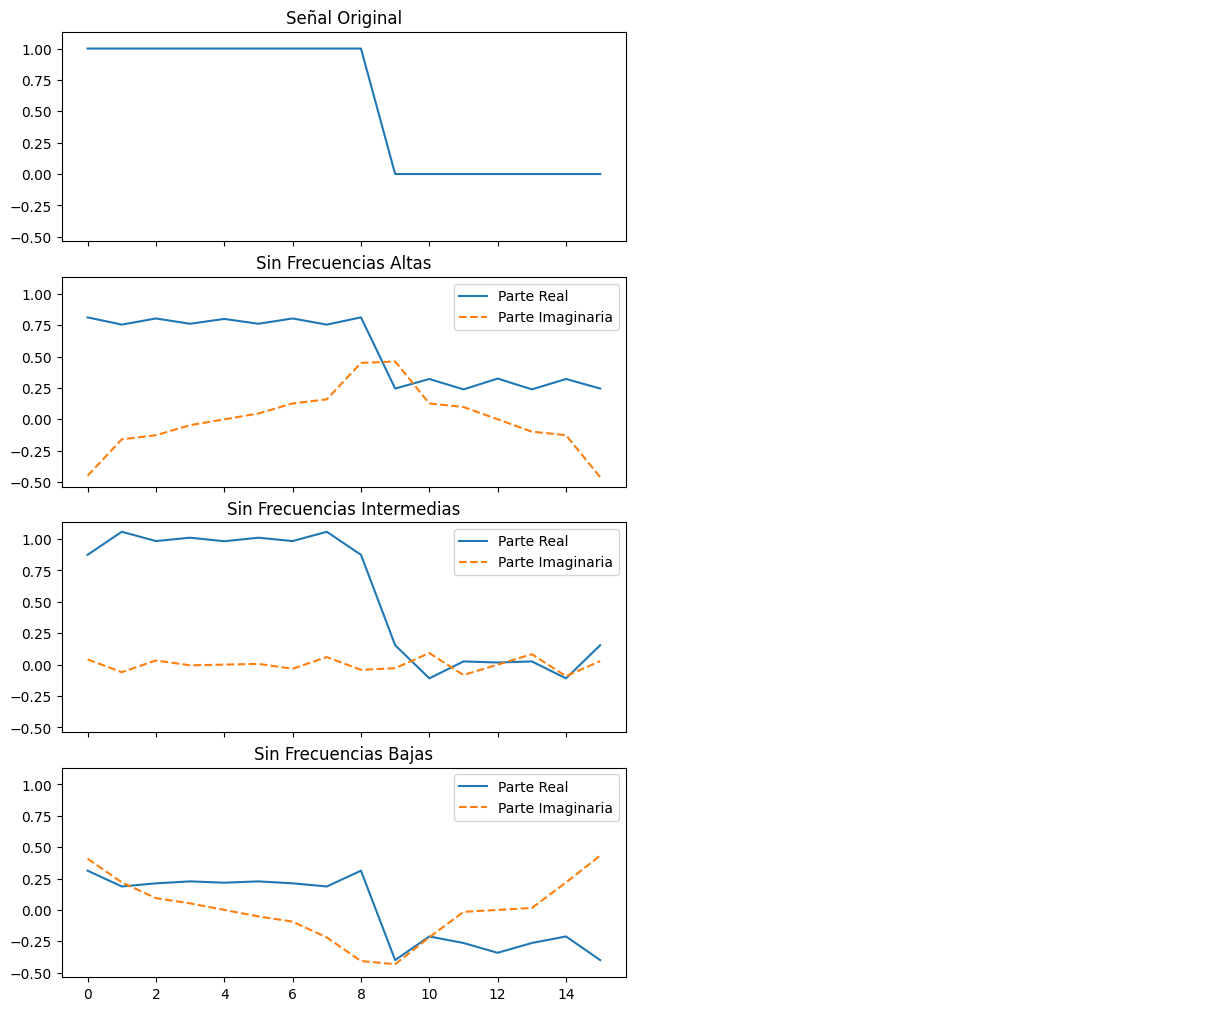

In [8]:
# Quiero dibujar la parte real y la imaginaria también
fig, axes = plt.subplots(4, 2, figsize=(12, 10), sharex=True, sharey=True, layout="constrained")

axes[0, 0].plot(range(senal.shape[0]), senal)
axes[0, 0].set_title("Señal Original")

# Sin Frecuencias Altas
axes[1, 0].plot(range(senal.shape[0]), senalSinAltas, label="Parte Real")
axes[1, 0].plot(range(senal.shape[0]), senalSinAltasImag, label="Parte Imaginaria", linestyle='--')
axes[1, 0].set_title("Sin Frecuencias Altas")
axes[1, 0].legend()

# Sin Frecuencias Intermedias
axes[2, 0].plot(range(senal.shape[0]), senalSinIntermedias, label="Parte Real")
axes[2, 0].plot(range(senal.shape[0]), senalSinIntermediasImag, label="Parte Imaginaria", linestyle='--')
axes[2, 0].set_title("Sin Frecuencias Intermedias")
axes[2, 0].legend()

# Sin Frecuencias Bajas
axes[3, 0].plot(range(senal.shape[0]), senalSinBajas, label="Parte Real")
axes[3, 0].plot(range(senal.shape[0]), senalSinBajasImag, label="Parte Imaginaria", linestyle='--')
axes[3, 0].set_title("Sin Frecuencias Bajas")
axes[3, 0].legend()

# Parte imaginaria en columnas separadas (vacías por ahora)
for i in range(4):
    axes[i, 1].axis('off')  # Desactivamos las columnas de la parte imaginaria

plt.show()

## Generar 10 imágenes y hacer la DFT y la IDFT de cada una









#### Aclaración: Nos dimos cuenta que implementar la fórmula exacta para la DFT e IDFT en dos dimensiones es poco eficiente y tarda mucho. Por lo tanto, nos aprovechamos de las funciones de numpy para operaciones entre matrices y calculamos las transformadas utilizándolas.


In [9]:
"""
Recuerden que DFT devuelve numeros complejos, en este caso querremos devolver 2
matrices, la primera contendra la magnitud del numero en la frecuencia y la segunda
contendra su angulo
"""
def DFT_2D_exacta(imagen):
  N = imagen.shape[0] # Asumimos imagenes cuadradas
  imagenModulo = np.zeros((N,N))  # Matriz de modulos
  imagenAngulo = np.zeros((N,N))  # Matriz de angulos
  for k in range(N): # Para F(k,l)
    for l in range(N): # Para F(k,l)
      sum = 0 # Inicializo suma
      for n in range(N):
        for m in range(N):
          exponente = -2j * np.pi * (m*k + n*l) / N  # Exponente (formula teorica)
          sum += imagen[m][n] * np.exp(exponente)

      # Calculo modulo y angulo
      imagenModulo[k][l] = np.abs(sum/N)
      imagenAngulo[k][l] = np.angle(sum/N)

  return imagenModulo, imagenAngulo


def IDFT_2D_exacta(frecuenciasMagnitud, frecuenciasAngulo):

  # Reconstruimos transformada (para seguir formula de teorica)
  frecuencias = frecuenciasMagnitud * np.exp(1j * frecuenciasAngulo)
  N = frecuenciasMagnitud.shape[0]
  imagen = np.zeros((N,N))
  for m in range(N): # Para f(m,n)
    for n in range(N): # Para f(m,n)
      sum = 0 # Inicializo suma
      for k in range(N):
        for l in range(N):
          exponente = 2j * np.pi * (m*k + n*l) / N  # Exponente (formula teorica)
          sum += frecuencias[k][l] * np.exp(exponente)

      imagen[m][n] = np.real(sum/N)

  return imagen


In [10]:
def DFT_2D(imagen):
    N = imagen.shape[0]  # Suponemos que la imagen es cuadrada

    # Creamos el vector de frecuencias
    n = np.arange(N)
    k = n.reshape((N, 1))  # Reshape para hacer broadcasting y poder multiplicar fácilmente
    W = np.exp(-2j * np.pi * k * n / N)  # Matriz de transformación (núcleo de la DFT)

    # Aplicamos la DFT en las filas y luego en las columnas
    # DFT por filas (multiplicamos cada fila por la matriz W)
    imagen_transformada = np.dot(W, imagen)  # Aplicamos DFT a las filas

    # DFT por columnas (multiplicamos cada columna por la matriz W)
    imagen_transformada = np.dot(imagen_transformada, W.T)  # Aplicamos DFT a las columnas

    # Obtenemos magnitud y fase
    imagenModulo = np.abs(imagen_transformada)
    imagenAngulo = np.angle(imagen_transformada)

    return imagenModulo, imagenAngulo

def IDFT_2D(frecuenciasMagnitud, frecuenciasAngulo):
    N = frecuenciasMagnitud.shape[0]

    # Reconstruimos la señal compleja a partir del módulo y ángulo
    frecuencias = frecuenciasMagnitud * np.exp(1j * frecuenciasAngulo)

    # Creamos el vector de frecuencias
    n = np.arange(N)
    k = n.reshape((N, 1))  # Reshape para hacer broadcasting
    W = np.exp(2j * np.pi * k * n / N)  # Matriz de transformación para la IDFT (signo positivo)

    # Aplicamos la IDFT en las columnas y luego en las filas
    # IDFT por columnas
    imagen_reconstruida = np.dot(W, frecuencias)  # Aplicamos IDFT a las filas

    # IDFT por filas
    imagen_reconstruida = np.dot(imagen_reconstruida, W.T)  # Aplicamos IDFT a las columnas

    # Dividimos por N^2 para normalizar
    imagen_reconstruida = np.real(imagen_reconstruida) / (N**2)

    return imagen_reconstruida



In [11]:
def mostrarDFTyIDFT(imagenOriginal):
  ## Aplicar DFS a la imagen
  dfsImagenMagnitud, dfsImagenPhase = DFT_2D(imagenOriginal)
  imagenReconstruida = IDFT_2D(dfsImagenMagnitud, dfsImagenPhase)

  # Cambiamos a plt.subplots(4) para que no se rompa
  # Cambiamos imagenCuadradoTransladado por imagenOriginal
  fig, axes = plt.subplots(1,4, figsize=(10, 10),sharex=True, sharey=True, layout="constrained")
  axes[0].matshow(imagenOriginal, cmap=plt.cm.gray)
  axes[0].set_title("Imagen Original")

  axes[1].matshow(dfsImagenMagnitud, cmap=plt.cm.gray)
  axes[1].set_title("dfsImagenMagnitud")

  axes[2].matshow(dfsImagenPhase, cmap=plt.cm.gray)
  axes[2].set_title("dfsImagenPhase")

  axes[3].matshow(imagenReconstruida, cmap=plt.cm.gray)
  axes[3].set_title("Imagen Reconstruida")

  plt.show()


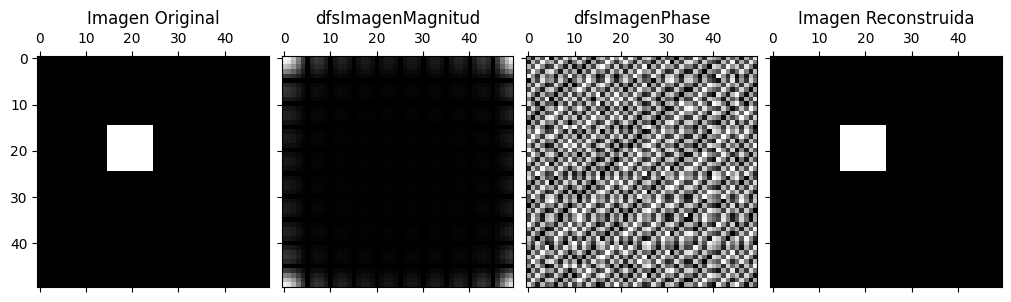

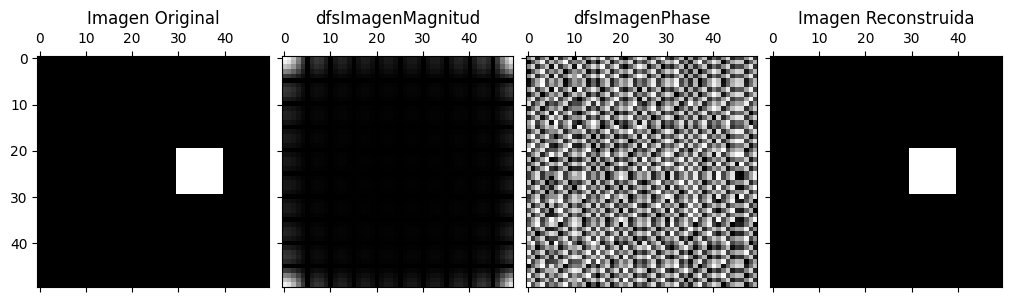

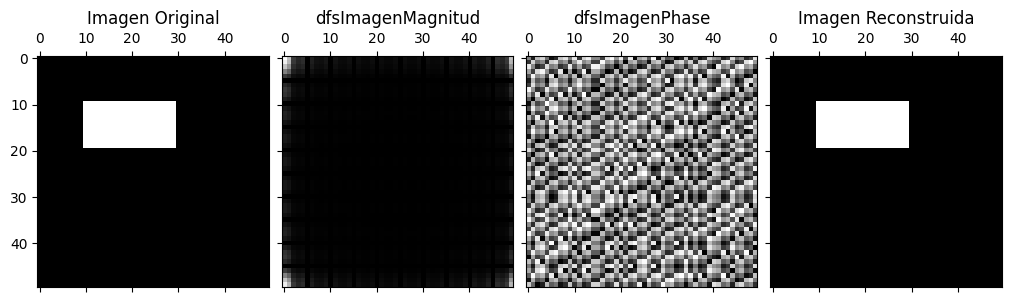

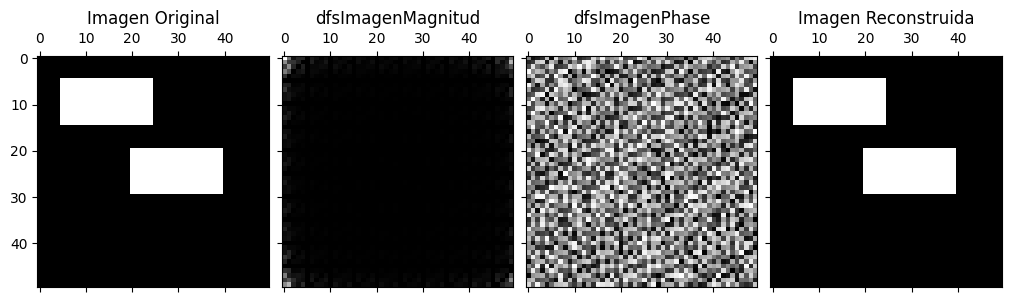

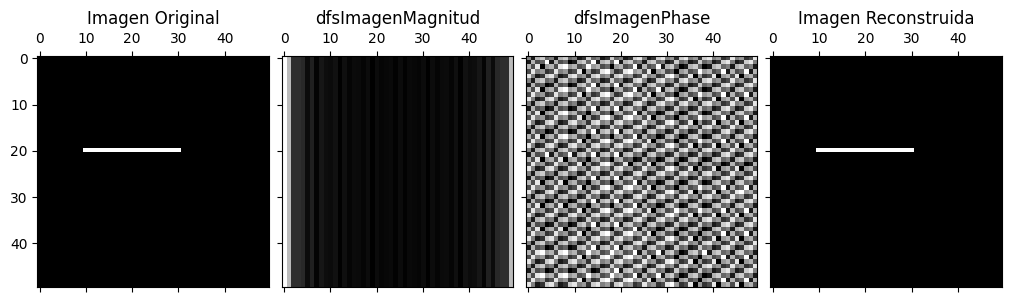

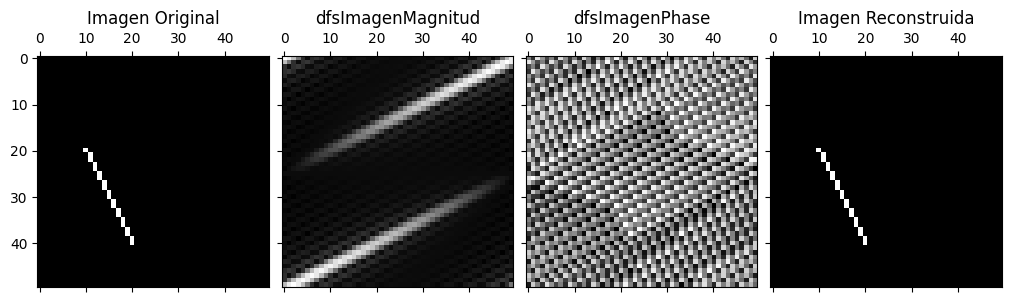

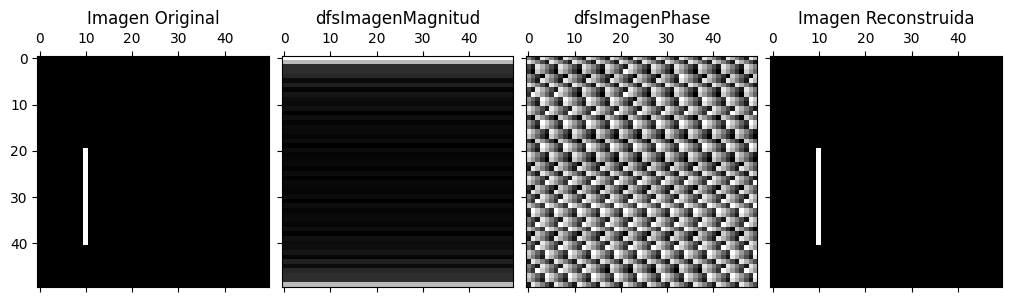

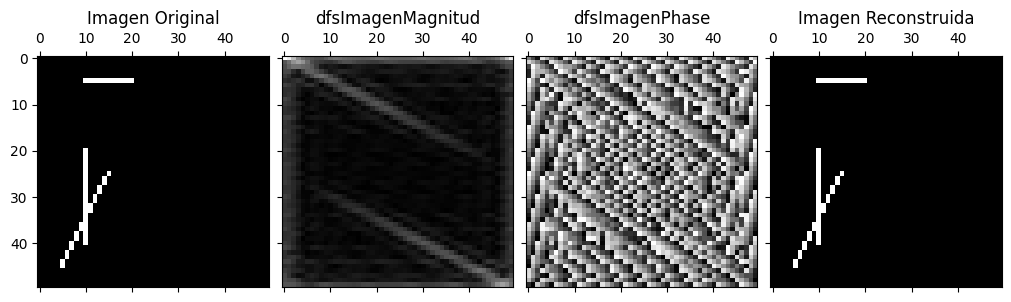

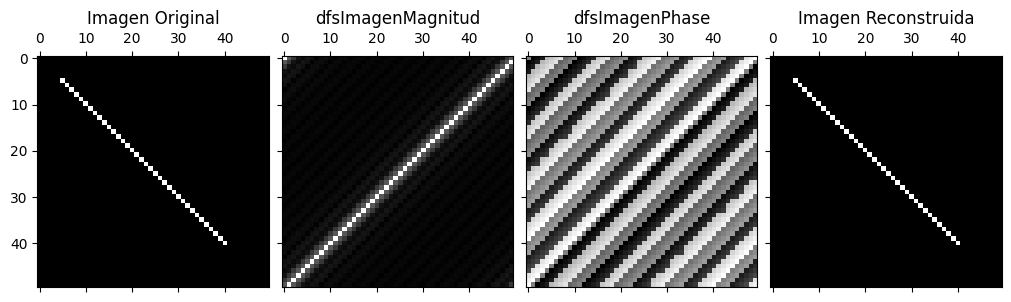

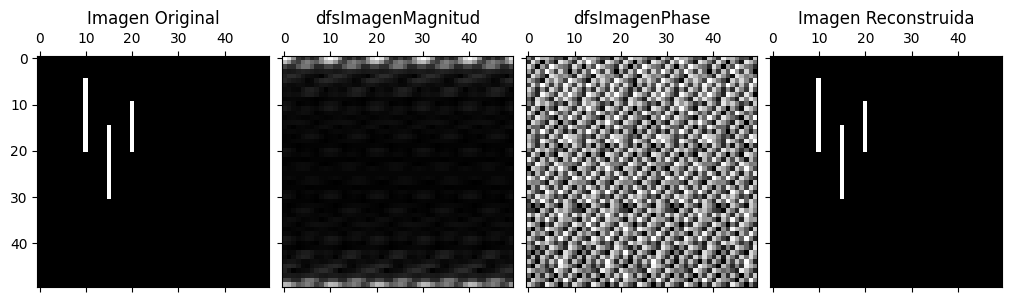

In [12]:
#Indicamos el tamano de la imagen
dimensionImagen = 50


#### Cuadrado Central ####
imagenCuadradoCentral = np.zeros((dimensionImagen, dimensionImagen), dtype=np.uint8)
#indicamos donde iniciara el cuadrado
start = (15,15)
#Dado el tamano de los lados y su punto de inicio, nos devuelve las filas y columnas que ocupara
rr, cc = rectangle(start, extent=(10, 10))
#Pintamos esas celdas de blanco
imagenCuadradoCentral[rr, cc] = 255
mostrarDFTyIDFT(imagenCuadradoCentral)

#### Cuadrado Transladado ####
#Creamos una imagen vacia
imagenCuadradoTransladado = np.zeros((dimensionImagen, dimensionImagen), dtype=np.uint8)
#indicamos donde iniciara el cuadrado
start = (20,30)
#Dado el tamano de los lados y su punto de inicio, nos devuelve las filas y columnas que ocupara
rr, cc = rectangle(start, extent=(10, 10))
#Pintamos esas celdas de blanco
imagenCuadradoTransladado[rr, cc] = 255
mostrarDFTyIDFT(imagenCuadradoTransladado)

#### Rectangulo ####
imagenRectangulo = np.zeros((dimensionImagen, dimensionImagen), dtype=np.uint8)
#indicamos donde iniciara el rectangulo
start = (10,10)
#Dado el tamano de los lados y su punto de inicio, nos devuelve las filas y columnas que ocupara
rr, cc = rectangle(start, extent=(10, 20))
#Pintamos esas celdas de blanco
imagenRectangulo[rr, cc] = 255
mostrarDFTyIDFT(imagenRectangulo)

#### 2 Rectangulos ####
imagenDosRectangulo = np.zeros((dimensionImagen, dimensionImagen), dtype=np.uint8)
# indicamos donde iniciara el rectangulo 1
start = (5,5)
#Dado el tamano de los lados y su punto de inicio, nos devuelve las filas y columnas que ocupara
rr, cc = rectangle(start, extent=(10, 20))

#Pintamos esas celdas de blanco
imagenDosRectangulo[rr, cc] = 255

# indicamos donde iniciara el rectangulo 2
start = (20,20)
rr, cc = rectangle(start, extent=(10, 20))

#Pintamos esas celdas de blanco
imagenDosRectangulo[rr, cc] = 255
mostrarDFTyIDFT(imagenDosRectangulo)

#### Linea Vertical ####
imagenLineaVertical = np.zeros((dimensionImagen, dimensionImagen), dtype=np.uint8)
#indicamos el punto de inicio y el final de la linea
rr, cc = line(20, 10, 20, 30)
imagenLineaVertical[rr, cc] = 255

mostrarDFTyIDFT(imagenLineaVertical)


#### Linea 45' ####
imagenLinea45 = np.zeros((dimensionImagen, dimensionImagen), dtype=np.uint8)
#indicamos el punto de inicio y el final de la linea
rr, cc = line(20, 10, 40, 20)
imagenLinea45[rr, cc] = 255
mostrarDFTyIDFT(imagenLinea45)

#### Linea 90' ####
imagenLinea90 = np.zeros((dimensionImagen, dimensionImagen), dtype=np.uint8)
#indicamos el punto de inicio y el final de la linea
rr, cc = line(20, 10, 40, 10)
imagenLinea90[rr, cc] = 255
mostrarDFTyIDFT(imagenLinea90)

#### Varias Lineas ####
imagenVariasLineas = np.zeros((dimensionImagen, dimensionImagen), dtype=np.uint8)
rr, cc = line(20, 10, 40, 10)
imagenVariasLineas[rr, cc] = 255
rr, cc = line(25, 15, 45, 5)
imagenVariasLineas[rr, cc] = 255
rr, cc = line(5, 10, 5, 20)
imagenVariasLineas[rr, cc] = 255
mostrarDFTyIDFT(imagenVariasLineas)

#### Varias Lineas 45' ####
imagenVariasLineas45 = np.zeros((dimensionImagen, dimensionImagen), dtype=np.uint8)
rr, cc = line(5, 5, 20, 20)
imagenVariasLineas45[rr, cc] = 255
rr, cc = line(20, 20, 40, 40)
imagenVariasLineas45[rr, cc] = 255
rr, cc = line(15, 15, 30, 30)
imagenVariasLineas45[rr, cc] = 255
mostrarDFTyIDFT(imagenVariasLineas45)

#### Varias Lineas 90' ####
imagenVariasLineas90 = np.zeros((dimensionImagen, dimensionImagen), dtype=np.uint8)
rr, cc = line(5, 10, 20, 10)
imagenVariasLineas90[rr, cc] = 255
rr, cc = line(10, 20, 20, 20)
imagenVariasLineas90[rr, cc] = 255
rr, cc = line(15, 15, 30, 15)
imagenVariasLineas90[rr, cc] = 255
mostrarDFTyIDFT(imagenVariasLineas90)


## Hacer la Transformada de Fourier de dos imágenes dadas (I1 e I2)

1.   Visualizar el módulo y la fase de cada una
2.   Realizar IDFS utilizando el modulo de I1 y la fase de I2
3.   Realizar IDFS utilizando el modulo de I2 y la fase de I1

Analizar el aporte del módulo y la fase en cada caso

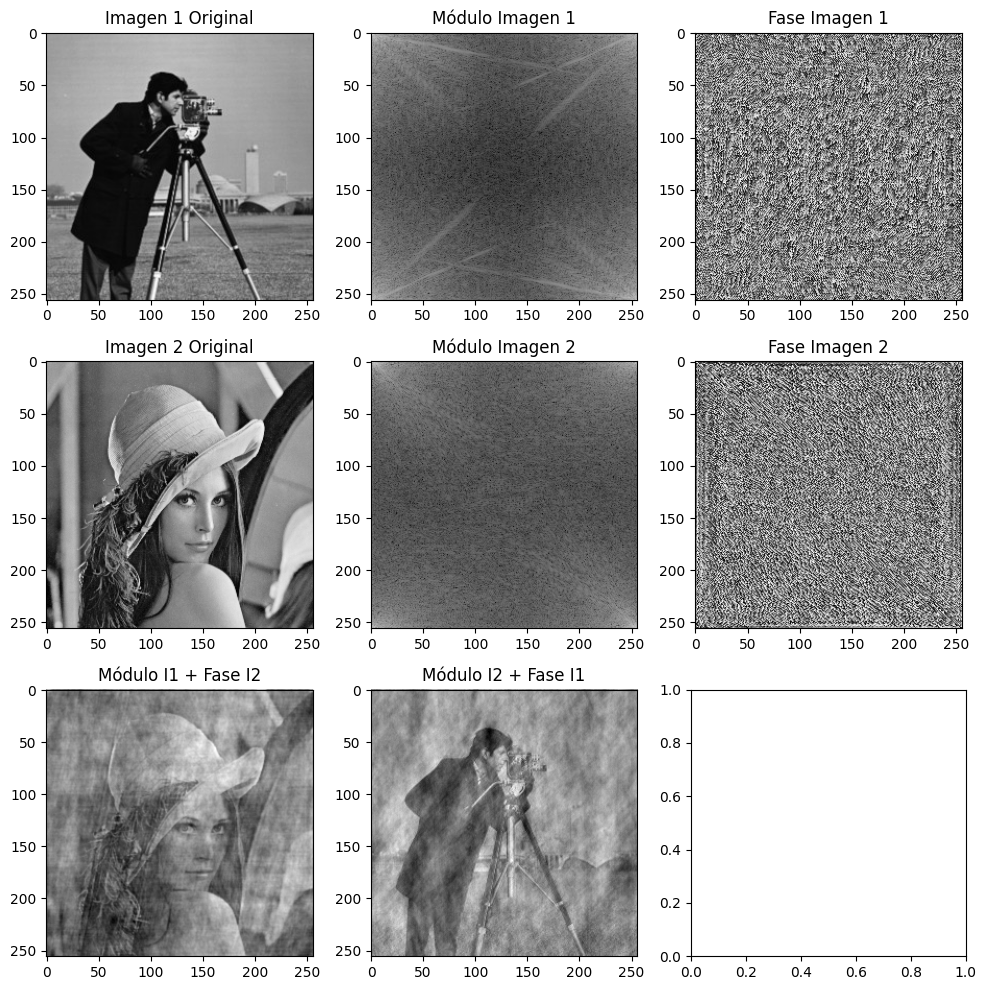

In [14]:
imagenUnoFilename = os.path.join("/content/Imagenes", 'cameraman256.jpg')
imagenUno = io.imread(imagenUnoFilename, as_gray=True) ## l1

imagenDosFilename = os.path.join("/content/Imagenes", 'lena_gray_256.tif')
imagenDos = io.imread(imagenDosFilename, as_gray=True) ##l2

# Realizo la DFT para ambas imágenes
imagenUnoModulo, imagenUnoFase = DFT_2D(imagenUno)
imagenDosModulo, imagenDosFase = DFT_2D(imagenDos)

fig, axes = plt.subplots(3, 3, figsize=(10, 10))

axes[0][0].imshow(imagenUno, cmap=plt.cm.gray)
axes[0][0].set_title('Imagen 1 Original')
axes[0][1].imshow(np.log(imagenUnoModulo + 1), cmap=plt.cm.gray)
axes[0][1].set_title('Módulo Imagen 1')
axes[0][2].imshow(imagenUnoFase, cmap=plt.cm.gray)
axes[0][2].set_title('Fase Imagen 1')

axes[1][0].imshow(imagenDos, cmap=plt.cm.gray)
axes[1][0].set_title('Imagen 2 Original')
axes[1][1].imshow(np.log(imagenDosModulo + 1), cmap=plt.cm.gray)
axes[1][1].set_title('Módulo Imagen 2')
axes[1][2].imshow(imagenDosFase, cmap=plt.cm.gray)
axes[1][2].set_title('Fase Imagen 2')

imagenReconstruida1 = IDFT_2D(imagenUnoModulo, imagenDosFase)
axes[2][0].imshow(np.real(imagenReconstruida1), cmap=plt.cm.gray)
axes[2][0].set_title('Módulo I1 + Fase I2')

imagenReconstruida2 = IDFT_2D(imagenDosModulo, imagenUnoFase)
axes[2][1].imshow(np.real(imagenReconstruida2), cmap=plt.cm.gray)
axes[2][1].set_title('Módulo I2 + Fase I1')



fig.tight_layout()
plt.show()


#### En este ejemplo es posible evidenciar lo que aportan a las imágenes sus módulos y fases. El módulo se relaciona con la intensidad de las frecuencias, nos define el espectro en el cual están compuestas nuestras imágenes. En cambio, la fase indica la posición de esas frecuencias, es decir, cómo están distribuídas espacialmente.

#### El ejercicio deja asentado que para la percepción de la imágen es mas relevante la fase, pues es la que nos indica cómo se combinan las señales para formar las imágenes; por esto se puede ver que donde se usa la fase de l2 se ve a lena y donde se usa la fase de l1 se ve al camarógrafo.


### Componer una imagen con Cameraman y líneas horizontales (sumarlas), y remover las líneas usando la transformada de Fourier.

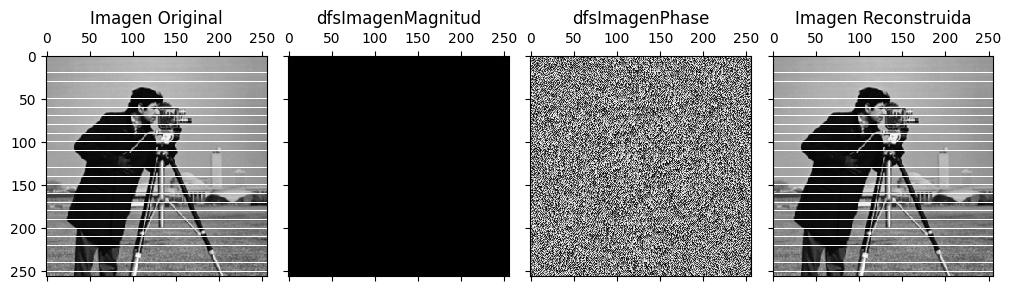

In [15]:
# Abrir la imagen
# Agregan las lineas horizontales
# Realizan la transformacion de Fourier
# Analizen las funciones devueltas y piensen si pueden detectar que frecuencia estan asociadas a las lineas
# Eliminen las lineas
# Ploteen el resutado en un subplot de 3, 2. La primer fila mostrando la imagen original, las lineas por separado y la composicion
# La segunda fila mostrando la funcion el plano de modulo, fase y la imagen sin las lineas

def agregar_lineas(imagen, espaciado=10, intensidad=255):
    imagen_con_lineas = np.copy(imagen)
    for i in range(0, imagen.shape[0], espaciado):
        imagen_con_lineas[i, :] = intensidad  # Agrega una línea horizontal blanca
    return imagen_con_lineas

  ##Uso la imagen del ej anterior

imagenLineas = agregar_lineas(imagenUno)
modulos, fases = DFT_2D(imagenLineas)
mostrarDFTyIDFT(imagenLineas)

#### En nuestra funcion de plotear los modulos y las fases no se notan mucho las diferencias, para ello shifteo y tomo el logaritmo de los modulos para reducir el "peso" de los valores altos.

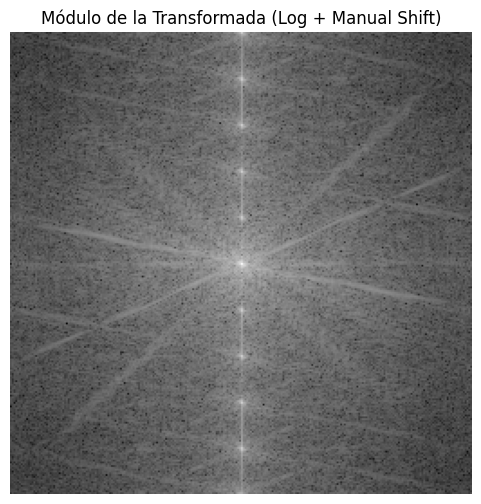

In [16]:
# Función para aplicar el shift manualmente (similar a fftshift)
def manual_fftshift(imagenModulo):
    N, M = imagenModulo.shape  # Dimensiones de la imagen

    # Dividimos la imagen en cuatro cuadrantes
    mitadN, mitadM = N // 2, M // 2

    imagenShifted = np.zeros_like(imagenModulo)

    # Intercambiamos los cuadrantes manualmente
    imagenShifted[:mitadN, :mitadM] = imagenModulo[mitadN:, mitadM:]  # Inferior derecha a superior izquierda
    imagenShifted[:mitadN, mitadM:] = imagenModulo[mitadN:, :mitadM]  # Inferior izquierda a superior derecha
    imagenShifted[mitadN:, :mitadM] = imagenModulo[:mitadN, mitadM:]  # Superior derecha a inferior izquierda
    imagenShifted[mitadN:, mitadM:] = imagenModulo[:mitadN, :mitadM]  # Superior izquierda a inferior derecha

    return imagenShifted


imagenModuloShifted = manual_fftshift(modulos)

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(np.log(imagenModuloShifted + 1), cmap=plt.cm.gray)
ax.set_title('Módulo de la Transformada (Log + Manual Shift)')
ax.axis('off')

plt.show()


#### Al shiftear se pueden ver intensidades a lo largo del eje vertical, esto se debe a las lineas horizontales aplicasdas a nuestra imagen.
#### Las removemos y ploteamos de nuevo


In [17]:
def remover_varias_frecuencias_verticales(imagenTransformada, altura=100, ancho=50, step=40):
    """
    Elimina "rectángulos" de frecuencia de altura y ancho específicos en la matriz de transformada de Fourier.
    """
    N, M = imagenTransformada.shape  # Dimensiones de la imagen transformada
    mitadN = N // 2  # Índice de la fila central
    mitadM = M // 2  # Índice de la columna central

    # Recorremos la matriz transformada a lo largo de las columnas, eliminando "rectángulos"
    for i in range(0, M, step):  # Recorre las columnas de la imagen cada "step" columnas
        # Remover las frecuencias en un rango definido por "altura" y "ancho"
        imagenTransformada[mitadN - altura//2:mitadN + altura//2,
                           max(0, mitadM - ancho//2 + i):min(M, mitadM + ancho//2 + i)] = 0

    return imagenTransformada


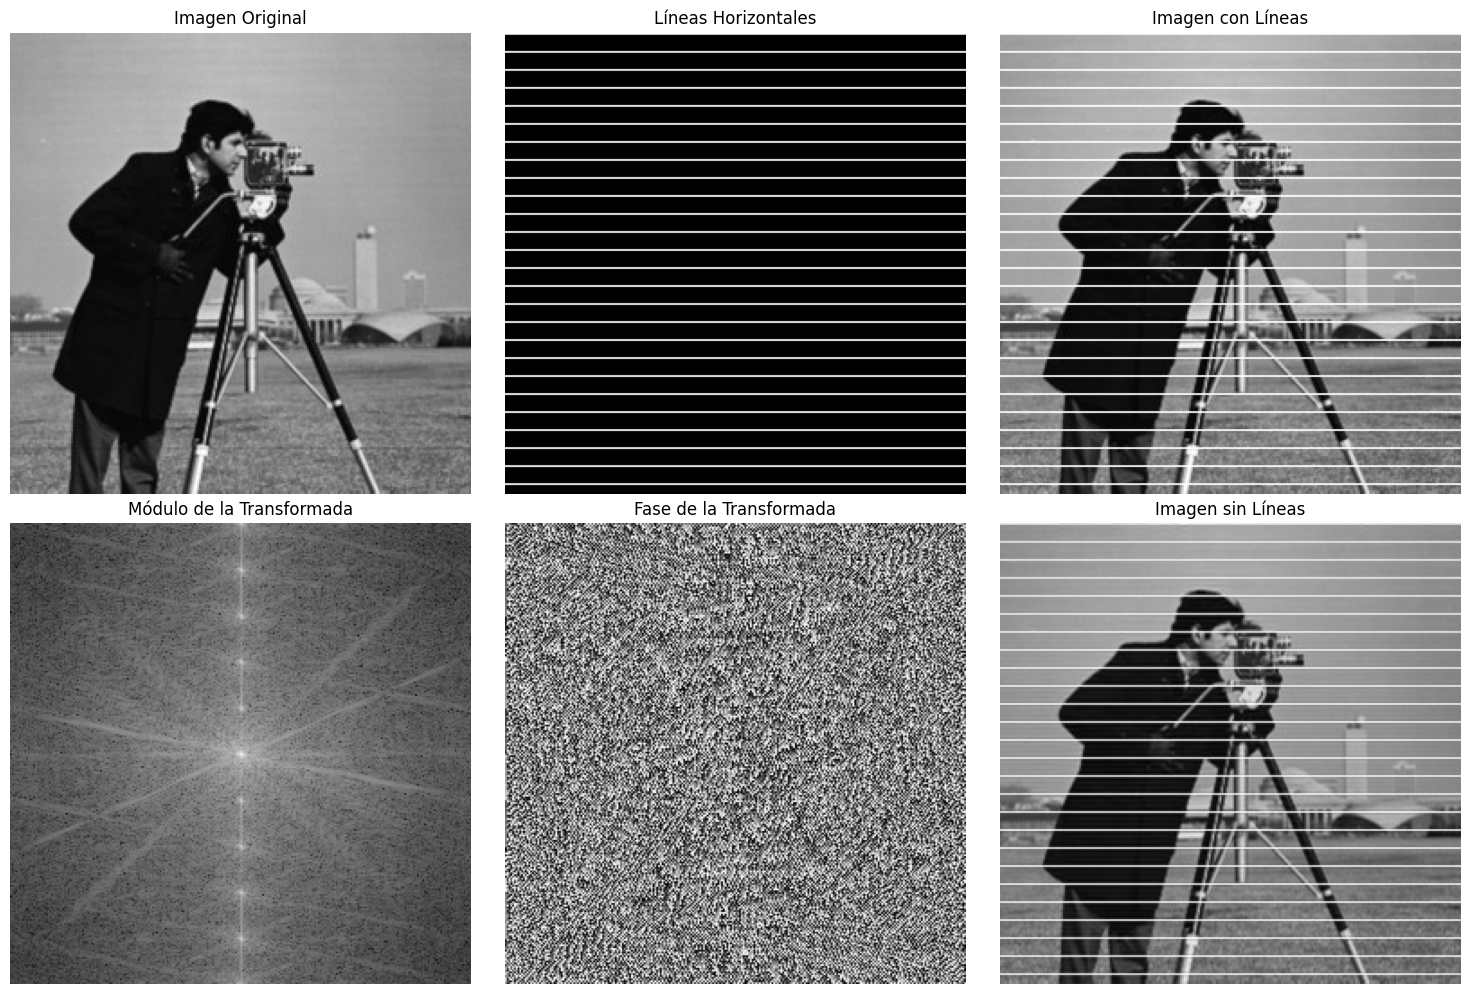

In [20]:
# Construimos la transformada completa (compleja) para eliminar las frecuencias verticales
imagenTransformada = modulos * np.exp(1j * fases)
imagenTransformada = remover_varias_frecuencias_verticales(imagenTransformada)

frecuenciasMagnitud = np.abs(imagenTransformada)
frecuenciasAngulo = np.angle(imagenTransformada)
imagenSinLineas = IDFT_2D(frecuenciasMagnitud, frecuenciasAngulo)


fig, axes = plt.subplots(2, 3, figsize=(15, 10))


axes[0][0].imshow(imagenUno, cmap=plt.cm.gray)
axes[0][0].set_title('Imagen Original')

lineas_separadas = agregar_lineas(np.zeros_like(imagenUno), espaciado=10)
axes[0][1].imshow(lineas_separadas, cmap=plt.cm.gray)
axes[0][1].set_title('Líneas Horizontales')

axes[0][2].imshow(imagenLineas, cmap=plt.cm.gray)
axes[0][2].set_title('Imagen con Líneas')

axes[1][0].imshow(np.log(imagenModuloShifted + 1), cmap=plt.cm.gray)
axes[1][0].set_title('Módulo de la Transformada')

axes[1][1].imshow(fases, cmap=plt.cm.gray)
axes[1][1].set_title('Fase de la Transformada')

axes[1][2].imshow(imagenSinLineas, cmap=plt.cm.gray)
axes[1][2].set_title('Imagen sin Líneas')

for ax in axes.ravel():
    ax.axis('off')

fig.tight_layout()
plt.show()

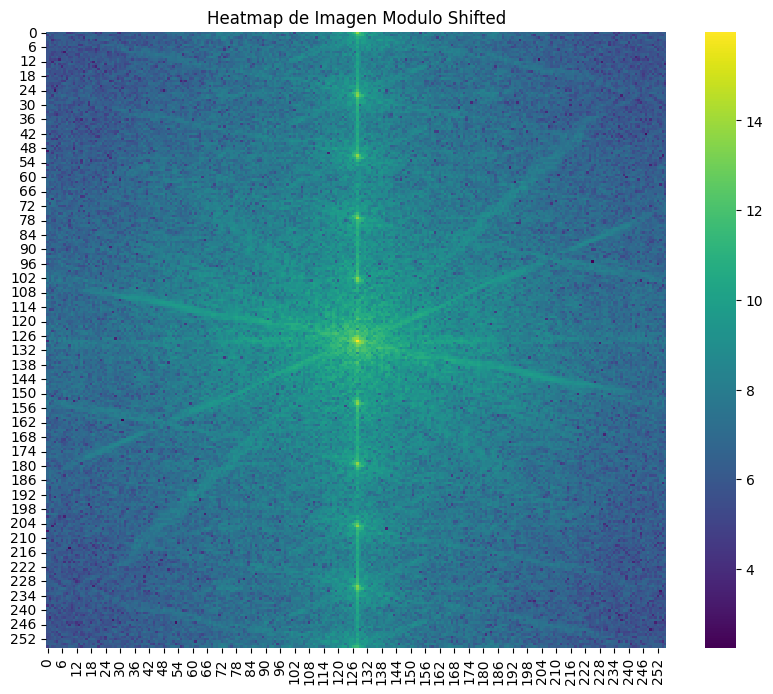

In [21]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(np.log(imagenModuloShifted + 1), cmap="viridis", cbar=True)
plt.title('Heatmap de Imagen Modulo Shifted')
plt.show()

In [ ]:
### Ploteamos un heatmap para ver las intensidades pero no podemos eliminar bien las bandas horizontales